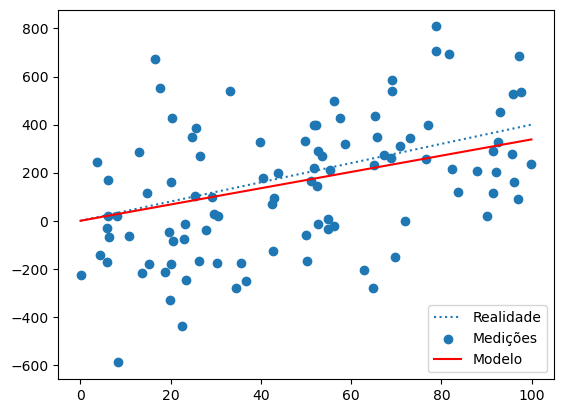

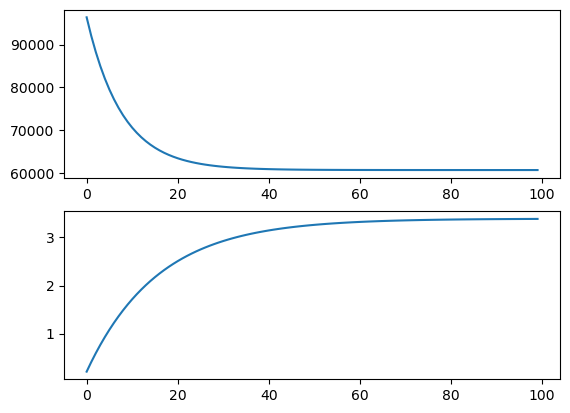

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Dados "reais"
a = 4
x = np.random.random(100) * 100
x = np.sort(x)
y = a * x

# Dados "medidos"
ym = y + np.random.randn(y.shape[0])*250

# Regressão: encontrando "modelo"
ahat = 0
alpha = 10**-5
lista_eqm = []
lista_ahat = []
for n in range(100):
    grad_acc = 0
    for i in range(len(x)):
        deidahat = 2 * x[i] * (ahat * x[i] - ym[i])
        grad_acc += deidahat/x.shape[0]
    eqm = np.mean( (ahat*x - ym)**2 )
    lista_eqm.append(eqm)
    ahat = ahat - alpha * grad_acc
    lista_ahat.append(ahat)

yhat = ahat * x

plt.figure()
plt.plot(x, y, ':', label='Realidade')
plt.scatter(x, ym, label='Medições')
plt.plot(x, yhat, 'r', label='Modelo')
plt.legend()
plt.show()

plt.figure()
plt.subplot(2,1,1)
plt.plot(lista_eqm)
plt.subplot(2,1,2)
plt.plot(lista_ahat)
plt.show()

In [65]:
import autograd.numpy as np_   # Thinly-wrapped version of Numpy
from autograd import grad

def loss(a):
    yhat = a * x
    mse = np_.mean( (yhat-ym)**2)
    return mse

dedahat = grad(loss)

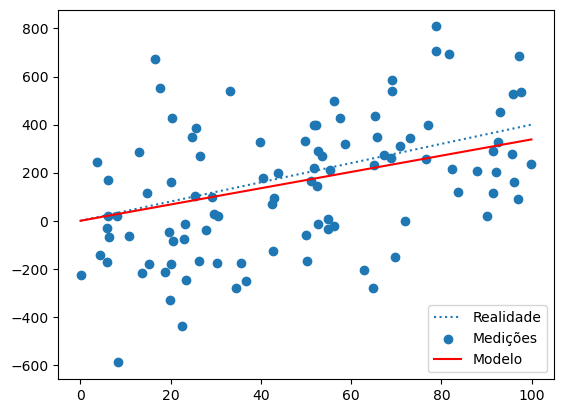

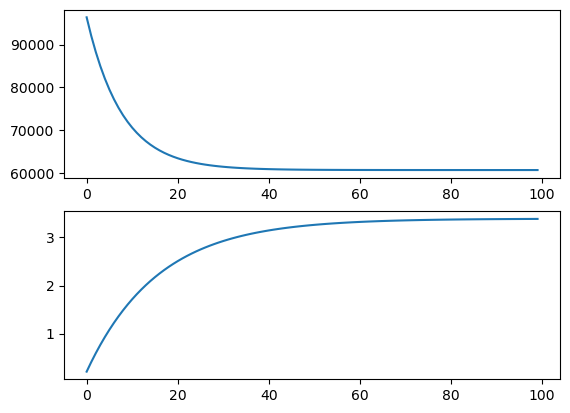

In [66]:
# Regressão: encontrando "modelo"
ahat = 0.0
alpha = 10**-5
lista_eqm = []
lista_ahat = []
for n in range(100):
    grad_ = dedahat(ahat)
    eqm = np.mean( (ahat*x - ym)**2 )
    lista_eqm.append(eqm)
    ahat = ahat - alpha * grad_
    lista_ahat.append(ahat)

yhat = ahat * x

plt.figure()
plt.plot(x, y, ':', label='Realidade')
plt.scatter(x, ym, label='Medições')
plt.plot(x, yhat, 'r', label='Modelo')
plt.legend()
plt.show()

plt.figure()
plt.subplot(2,1,1)
plt.plot(lista_eqm)
plt.subplot(2,1,2)
plt.plot(lista_ahat)
plt.show()


# Parte 1

## Exercício 1
**Objetivo: Visualizar pontos medidos e comparar com uma teoria**

Quando observamos a realidade, somos capazes de *medir* coisas. Por exemplo, podemos tentar medir a velocidade do som da seguinte forma: uma pessoa dá um grito ao mesmo tempo em que aciona um cronômetro, e outra pessoa, a alguns metros de distância, pára esse mesmo cronômetro no momento em que ouve o grito. Repetimos o experimento para várias distâncias diferentes e conseguimos, então, uma série de medidas pareadas de tempo e distância.

Se fôssemos capazes de acionar o cronômetro exatamente no tempo em que o grito é emitido, e pudéssemos parar o cronômetro exatamente no instante em que o grito é ouvido, então teríamos a seguinte situação:

Sabemos que o som se propaga em uma determinada velocidade, que é constante, e portanto o som obedece a um movimento uniforme. Vamos chamar essa velocidade de $c$. Para cada distância $\Delta s$ teríamos um tempo de propagação igual a $t = \frac{1}{c} \Delta s$.

Essa ideia de que um fenômeno obedece a uma equação (ou a um modelo, ou a uma "regra", ou uma lei) chama-se *teoria*. Então, poderíamos ter resultados *teóricos* que poderiam se parecer com:

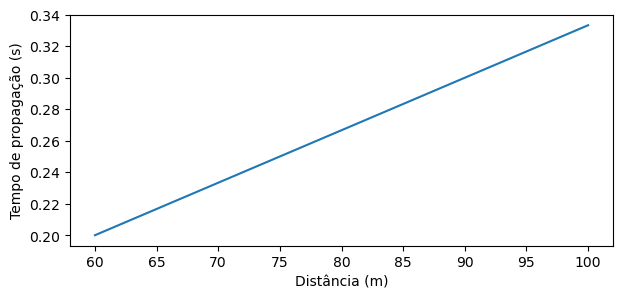

In [2]:
import numpy as np
import matplotlib.pyplot as plt

c = 300 # velocidade do som, em metros por segundo - esse valor foi absolutamente inventado para fins de exemplo
delta_s = np.linspace(60,100,20) # medimos 20 distâncias, indo de 60 a 100 metros
t = (1/c) * delta_s

plt.figure(figsize=(7,3))
plt.plot(delta_s, t)
plt.xlabel('Distância (m)')
plt.ylabel('Tempo de propagação (s)')
plt.show()

Porém, na realidade, nossa medição é bastante imperfeita. A primeira fonte dessas imperfeições é que, ao medirmos o tempo de propagação do som, usamos um cronômetro acionado manualmente - então, não somos capazes de acionar o cronômetro *exatamente* no instante em que o som é gerado ou recebido. Outra fonte de erro é que a velocidade do som não é *exatamente* uma constante, porque alterações como ventos e diferenças de temperatura do ar podem afetar a propagação sonora. Também, há fontes de erro que não somos exatamente capazes de prever.

Cada um desses erros gera um desvio, e cada um desses desvios tem uma distribuição diferente. Quando somamos todos esses desvios com distribuições diferentes, temos um desvio total com uma distribuição Gaussiana (lembre-se que a Normal, ou Gaussiana, é a distribuição que aparece quando somamos várias contribuições aleatórias de diferentes fontes!) com média zero e desvio padrão que não conhecemos ainda. Então, poderíamos encontrar, de fato, a seguinte situação:

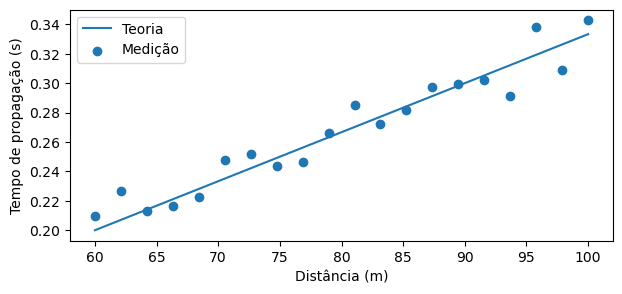

In [3]:
import numpy as np
import matplotlib.pyplot as plt

c = 300 # velocidade do som, em metros por segundo - esse valor foi absolutamente inventado para fins de exemplo
delta_s = np.linspace(60,100,20) # medimos 20 distâncias, indo de 60 a 100 metros
t = (1/c) * delta_s

desvio_padrao_da_medicao = 0.01 # Desvio padrão, em segundos - esse número também é inventado!
t_medido = t + np.random.randn(20) * desvio_padrao_da_medicao

plt.figure(figsize=(7,3))
plt.plot(delta_s, t, label='Teoria')
plt.scatter(delta_s, t_medido, label='Medição')

plt.xlabel('Distância (m)')
plt.ylabel('Tempo de propagação (s)')
plt.legend()
plt.show()

O problema disso tudo é que, geralmente, não conseguimos saber quais são os parâmetros "reais" do fenômeno - na verdade, não sabemos nem ao certo que ele obedece a alguma equação. Por isso, precisamos trabalhar com essa suposição sobre como o fenômeno se comporta, e por isso essa suposição é chamada de *teoria*, e não de *realidade*.

A palavra *teoria* pode ser entendida como: "uma ideia que existe dentro na nossa cabeça e que pode ou não corresponder à realidade". Claro que gostaríamos que nossa teoria se aproximasse mais da nossa realidade - realidade essa que só pode ser acessada à partir das medições. Então, vamos elaborar *hipóteses* sobre o fenômeno e usá-las para encontrar nosso modelo teórico.

Usando o código abaixo, discuta:

a) Apenas olhando a figura, é possível decidir qual das hipóteses é a que melhor explica os pontos que foram medidos? O que significa "explicar melhor"?

b) Quando aumentamos o `desvio_padrao_da_medicao`, fica mais fácil ou mais difícil decidir por uma hipótese?

c) Quando diminuimos o `desvio_padrao_da_medicao`, fica mais fácil ou mais difícil decidir por uma hipótese?

d) Quando aumentamos o número de pontos medidos, fica mais fácil ou mais difícil decidir por uma hipótese?

e) Quando diminuímos o número de pontos medidos, fica mais fácil ou mais difícil decidir por uma hipótese?

f) Se as hipóteses forem muito próximas umas das outras, é mais fácil ou mais difícil escolher uma delas?

g) Se as hipóteses forem muito próximas umas das outras, é mais relevante ou menos relevante escolher exatamente a hipótese correta?

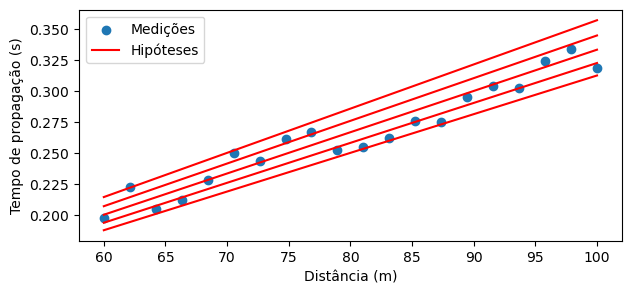

In [4]:
import numpy as np
import matplotlib.pyplot as plt

c = 300 # velocidade do som, em metros por segundo - esse valor foi absolutamente inventado para fins de exemplo
delta_s = np.linspace(60,100,20) # medimos 20 distâncias, indo de 60 a 100 metros
t = (1/c) * delta_s

desvio_padrao_da_medicao = 0.01 # Desvio padrão, em segundos - esse número também é inventado!
t_medido = t + np.random.randn(20) * desvio_padrao_da_medicao

plt.figure(figsize=(7,3))
plt.scatter(delta_s, t_medido)
plt.plot(delta_s, (1/280) * delta_s, 'r')
plt.plot(delta_s, (1/290) * delta_s, 'r')
plt.plot(delta_s, (1/300) * delta_s, 'r')
plt.plot(delta_s, (1/310) * delta_s, 'r')
plt.plot(delta_s, (1/320) * delta_s, 'r')
plt.xlabel('Distância (m)')
plt.ylabel('Tempo de propagação (s)')
plt.legend(['Medições', 'Hipóteses'])
plt.show()

## Exercício 2
*Objetivo: encontrar e analisar o erro de aproximação entre modelo e medidas*

Uma característica dos modelos teóricos é que eles existem somente no mundo das abstrações. É claro que, se quisermos usar nosso modelo teórico para fazer algum tipo de predição, então precisamos de um modelo teórico que se aproxime da realidade. Em outras palavras, ao compararmos dois modelos teóricos, como nas curvas abaixo, gostaríamos de escolher o modelo da curva azul, e não o da curva vermelha:

<img src="teoria_boa_vs_nao_boa.png" />

Claro que não podemos usar o critério de "olho" ou "intuição" para fazer essa escolha (até podemos no sentido de capacidade, ou mesmo de legalidade, mas com certeza não deveríamos). Ao invés disso, queremo usar um critério objetivo, isto é, encontrar um número que nos diga o quão bom é um modelo. Uma das propostas mais comuns para isso é o **erro quadrático médio**, ou EQM, que funciona da seguinte forma:

    Para cada ponto medido (x,y), com o modelo y_est=a*x_medido+b:
        estime o valor fornecido pelo modelo y_est = a*x_medido + b
        calcule o erro quadrático EQ = (y_est-y_medido)**2
    
    Após:
        calcule o EQM como a média de todos os EQs

Outra maneira de entender o EQM é como uma equação:

$$
\text{EQM} = \frac{1}{N} \sum_{n=1}^N (y_n - (ax_n + b))^2
$$

Nesta atividade, vamos analisar como o EQM se comporta quando variamos os coeficientes do modelo.

1. No código abaixo, complete a função `EQM` para que ela calcule o EQM de um modelo linear frente a medições recebidas como entrada.
1. Na figura que é gerada, qual é o coeficiente angular teórico que leva ao menor EQM? Como ele se compara com o EQM teórico?
1. Aumente o `desvio_padrao_da_medicao`. Como isso afeta o valor mínimo do EQM?

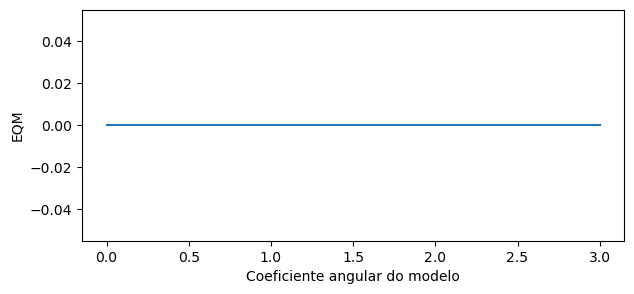

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def erro( parametros ):
    medidas_x, medidas_y, coef_angular_modelo, coef_linear_modelo = parametros
    # Complete esta função

    return 0

# Gerando a medição
medidas_x = np.linspace(10,30,5)
coef_linear_real = 0
coef_angular_real = 1.7
desvio_padrao_da_medicao = 0.1 # Desvio padrão, em segundos - esse número também é inventado!
medidas_y = coef_linear_real + coef_angular_real * medidas_x + np.random.randn(len(medidas_x)) * desvio_padrao_da_medicao

# Gerando o modelo
coef_linear_modelo = 0
coef_angular_modelo = 1.8

# Candidatos
candidatos_coef_angular = np.linspace(0,3,1000)
eqms = []
for idx, a_ in enumerate(candidatos_coef_angular):
    erro_quadratico_medio = erro( (medidas_x, medidas_y, a_, coef_linear_modelo) )
    eqms.append(erro_quadratico_medio)

plt.figure(figsize=(7,3))
plt.plot(candidatos_coef_angular, eqms)
plt.xlabel('Coeficiente angular do modelo')
plt.ylabel('EQM')
plt.show()


## Exercício 3
*Objetivo: Calcular a derivada do erro em relação aos parâmetros da reta*

Em várias aplicações, sabemos de antemão que o coeficiente linear do modelo é zero. Isso significa que o erro do modelo é simplesmente:

$$
\text{EQM} = \frac{1}{N} \sum_{n=1}^N (y_n - a x_n)^2 = \frac{1}{N} \sum_{n=1}^N y_n^2 - 2 a x_n y_n + a^2 x_n^2
$$

1. Calcule a derivada de EQM em relação ao coeficiente angular $a$, isto é, calcule (no papel) $e'(a) = \frac{d\text{EQM}}{da}$. DICA: calcule a derivada para um único ponto (por exemplo, $n=1$), e então some as derivadas para todos os pontos.
1. Implemente o cálculo de $e'(a)$ na função abaixo. Quais são os valores de $e'(a)$ quando $a$ (o coeficiente angular do modelo) é muito superior ao coeficiente angular "real"? E se $a$ é inferior ao coeficiente angular "real"?

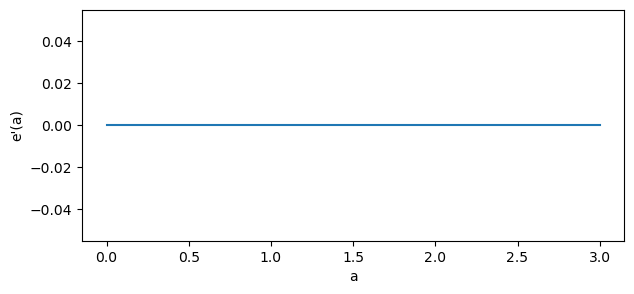

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def deqm_da(medidas_x, medidas_y, coef_angular_tentativa):
    # Complete esta função

    return 0

# Gerando a medição
medidas_x = np.linspace(10,30,5)
coef_angular_teorico = 1.7
desvio_padrao_da_medicao = 0.1 # Desvio padrão, em segundos - esse número também é inventado!
medidas_y = coef_angular_teorico * medidas_x + np.random.randn(len(medidas_x)) * desvio_padrao_da_medicao

# Gerando o modelo
coef_angular_modelo = 1.8

# Candidatos
candidatos_coef_angular = np.linspace(0,3,1000)
eqms = []
for idx, a_ in enumerate(candidatos_coef_angular):
    erro_quadratico_medio = deqm_da(medidas_x, medidas_y, a_)
    eqms.append(erro_quadratico_medio)

plt.figure(figsize=(7,3))
plt.plot(candidatos_coef_angular, eqms)
plt.xlabel('a')
plt.ylabel("e'(a)")
plt.show()


# Exercício 4
*Objetivo: entender o processo de descida pelo gradiente*

Partindo de um modelo linear com coeficiente angular $a$, podemos estimar um novo modelo usando:

$a_{\text{novo}} = a_{\text{atual}} + \alpha e'(a)$, onde $\alpha$ é um valor pequeno e positivo como $0.01$.

1. O modelo com coeficiente linear $a_{\text{novo}}$ deve ter EQM maior ou menor que o modelo com $a_{\text{atual}}$?
1. Como poderíamos mudar o procedimento de estimativa de forma que o modelo novo tenha EQM menor que o modelo antigo?
1. Usando as funções que você já implementou, complete a função `melhorar_modelo` no código abaixo de forma a implementar o cálculo de um $a_{\text{novo}}$.
1. Aplicando sucessivamente a função melhorar_modelo, verifique se você consegue aproximar o coeficiente angular teórico dos dados:

In [6]:
def melhorar_modelo(medidas_x, medidas_y, alpha, a_atual):
    a_novo = a_atual * 0.9 #Modifique isso 
    return a_novo

# Gerando a medição
medidas_x = np.linspace(10,30,5)
coef_angular_teorico = 1.7
desvio_padrao_da_medicao = 0.5 # Desvio padrão
medidas_y = coef_angular_teorico * medidas_x + np.random.randn(len(medidas_x)) * desvio_padrao_da_medicao

# Buscar sucessivamente por coeficientes angulares
a_ = 5.0 # Esse é o coeficiente angular tentativa
alpha = 0.1
for _ in range(100):
    a_ = melhorar_modelo(medidas_x, medidas_y, alpha, a_)

print("Coeficiente angular encontrado:", a_)
print("Coeficiente angular real:", coef_angular_teorico)

Coeficiente angular encontrado: 0.00013280699443793772
Coeficiente angular real: 1.7


## Exercício 5
*Objetivo: estimar um coeficiente angular em dados reais*

Neste experimento, estimaremos a aceleração da gravidade ($g$). O experimento funciona da seguinte forma:

* Sabemos que o tempo de queda $t$ de um objeto que cai de uma altura $h$ é dado por $t=\sqrt{\frac{2h}{g}}$.
* Isso significa que $t^2 = \frac{2}{g} h$
* Então, se assumirmos que $y=t^2$ e $x=h$, podemos encontrar uma reta $y=ax$ onde $a=\frac{2}{g}$.

O procedimento experimental, portanto, é:

1. Escolha um objeto que pode ser jogado sem quebrar (por exemplo, uma borracha).
1. Solte o objeto de uma altura conhecida $h$ e meça o tempo de queda $t$ usando um cronômetro (pode ser, por exemplo, o cronômetro do celular)
1. Anote a altura e o tempo de queda.
1. Repita o procedimento até juntar algumas dezenas de pontos. Compartilhe suas medições com o restante da turma!!!
1. Calcule $y=t^2$ para todos os seus pontos
1. Use o procedimento que fizemos no exercício anterior para estimar o valor do coeficiente $a$ no modelo linear
1. À partir do coeficiente $a$, calcule o valor da aceleração da gravidade usando $a=\frac{2}{g}$.

Quanto vale a aceleração da gravidade $g$ na sua sala de aula?

# Parte 2

## Exercício 6
**Objetivo: Encontrar a derivada de uma função**

Até o momento, estamos encontrando os parâmetros do nosso modelo dando pequenos passos na direção contrária à derivada do erro em relação ao parâmetro, isto é, a n-ésima iteração do parâmetro $a$ é encontrada usando:

$$
a_n = a_{n-1} - \alpha \frac{dE}{da},
$$

onde $E$ é o erro que calculamos (por exemplo o EQM) e $\alpha$ é um número real bem pequeno.

Podemos calcular a derivada do erro em relação a todos os parâmetros do nosso modelo, mas é claro que em modelos mais complicados o cálculo desse gradiente vai ficando cada vez mais difícil. Por isso, podemos usar o pacote `autograd`, que calcula automaticamente o gradiente de uma função chamada `loss` em relação aos parâmetros livres de um modelo. Se você quiser saber mais sobre como o autograd funciona, uma boa ideia é começar na própria [página web do autograd](https://github.com/HIPS/autograd/blob/master/docs/tutorial.md).

Neste exercício, verificaremos que o autograd, de fato, funciona, e como é sua mecânica, usando uma função polinomial.

1. No código abaixo, identifique qual é o polinômio $p(x)$ que está sendo calculado. Quais são os *coeficientes* do polinômio?
1. Calcule manualmente a derivada do polinômio em relação a x, e complete a função `derivada`
1. Teste sua função `derivada` em alguns pontos e verifique que ela está correta

In [ ]:
def polinomio( parametros ):
    x, a0, a1, a2 = parametros
    px = a0 + a1*x + a2*x**2.0
    return px

def derivada( parametros ):
    x, a0, a1, a2 = parametros
    return 0

a0 = -1.
a1 = 0.
a2 = 1.
x = 0.
print(polinomio ( (x, a0, a1, a2) ))
print(derivada ( (x, a0, a1, a2) ))


# Exercício 7
**Objetivo: usar autograd para encontrar a derivada de uma função**

Embora calcular derivadas de polinômios seja um caso relativamente simples (quando comparado a outras derivadas), é comum que desejemos calcular derivadas de funções mais complicadas, ou simplesmente que náo queiramos nos preocupar com a derivada de uma função. Para isso, usamos o pacote `autograd`. A função que usaremos é a função `grad`.

Veja no código abaixo como a função `grad` funciona. Usando essas ideias, faça uma função `derivada_do_polinomio` que calcula a derivada do polinômio que você encontrou no exercício anterior, e verifique como ela fornece as mesmas informações que a função `derivada` que você já fez.

In [9]:
import autograd.numpy as np_
from autograd import grad

def funcao_que_quero_derivar ( parametros_como_tupla ):
    parametro1, parametro2 = parametros_como_tupla
    return parametro1 + parametro2**3 + 1

derivada_por_autograd = grad(funcao_que_quero_derivar)

derivada1, derivada2 = derivada_por_autograd( (1., 2.) ) # Veja como passei os parametros como uma tupla!
print(derivada1, derivada2)

1.0 12.0


## Exercício 8
**Objetivo: usar autograd para minimizar o EQM de uma aproximação**

Usando o procedimento de calcular a derivada do erro em relação a cada um dos parâmetros do modelo, use `autograd` para minimizar o EQM da aproximação $y=ax+b$ para os dados medidos abaixo. Os parâmetros $a$ e $b$ do modelo se aproximam dos "reais", que foram usados para gerar os dados?

In [ ]:
# Dados "reais"
a_real = 4
b_real = 10
x = np.random.random(100) * 100
x = np.sort(x)
y = a_real * x + b_real

# Dados "medidos"
ym = y + np.random.randn(y.shape[0])*250

In [14]:
import autograd.numpy as np_
from autograd import grad

def erro( parametros ):
    a, b, x, y_medido = parametros
    yhat = a * x + b
    mse = 0 # modifique esta linha!!
    return mse

g = grad(erro)

a_modelo, b_modelo = 0.0, 0.0
alpha = 0.1
for _ in range(100): # por 10 iterações...
    pass
    # Calcular gradiente

    # Modificar parametros do modelo para reduzir o erro

print(a_modelo, b_modelo)

0.0 0.0


## Exercício 9
**Objetivo: usar autograd para realizar um experimento científico**

Usando os dados que você já tem do tempo de queda de objetos, re-faça o experimento de descobrir a gravidade usando `autograd`.

In [17]:
import autograd.numpy as np_
from autograd import grad

# Faça seu código aqui

# Parte 3

## Exercício 10
*Objetivo: entender o problema de classificação linear*

Podemos calcular um valor para cada ponto em um plano cartesiano fazendo uma função. Por exemplo, podemos dizer que o ponto $(x,y)$ tem um "valor" $f(x,y) = x+y$. Uma possibilidade para esse tipo de função é que ela seja uma função linear, ou seja:

$$
f(x,y) = Ax + By + C
$$

Nos pontos em que $f(x,y)=0$, encontramos que $Ax + By + C=0$, que é a equação de uma reta.

O código abaixo mostra como isso divide o plano entre o lado "positivo" e o "negativo".

1. Adicione ao *plot* o desenho da reta $Ax+By+C$ que realiza a divisão dos lados positivo e negativo.
1. Se as variáveis $x$ e $y$ representam a altura e o peso de personagens (em alguma unidade imaginária em que nossos números fazem sentido), e queremos identificar elfos e anões do Senhor dos Anéis, relacione os grupos (azul e vermelho) a suas categorias (elfos ou anões).

(2, 237) (2, 263)


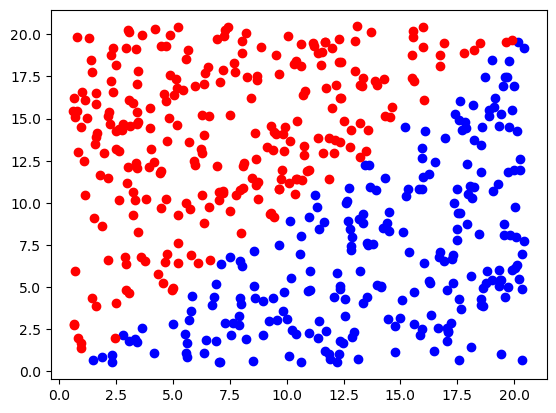

In [32]:
import matplotlib.pyplot as plt
import numpy as np

A = 1.0
B = -1.0
C = -0.5

pontos = np.random.random( (2,500) )*20+.5
funcao = A*pontos[0,:] + B*pontos[1,:] + C

pontos_pos = pontos[:, funcao > 0]
pontos_neg = pontos[:, funcao < 0]
print(pontos_pos.shape, pontos_neg.shape)
plt.figure()
plt.scatter(pontos_pos[0,:], pontos_pos[1,:], c='b')
plt.scatter(pontos_neg[0,:], pontos_neg[1,:], c='r')
plt.show()

## Exercício 11
**Objetivo: Usar autograd para modelar sistema de classificação usando EQM**

Veja que agora fizemos um classificador cujos parâmetros são $A$, $B$ e $C$, e cujas entradas são $x$ e $y$. Em situações reais, raramente sabemos os parâmetros $A$, $B$ e $C$, e gostaríamos de identificá-los através de dados. Para isso, vamos usar a estratégia de descida pelo gradiente, assim como temos feito para o problema de regressão.

Gostaríamos de estimar uma função $f(x,y) = Ax+By+C$ de tal forma que $f(x_p,y_p)=1$ se $(x_p,y_p)$ for um ponto da categoria (ou classe) 1, e  $f(x_p,y_p)=-1$ se $(x_p,y_p)$ caso os pontos sejam da categoria 2.

O erro do nosso modelo é o EQM que relaciona $f(x,y)$ estimado pelo nosso modelo com os valores desejados 1 e -1.

1. Usando o que já fizemos, use o `autograd` para estimar o modelo $f(x,y) = Ax+By+C$ à partir dos dados abaixo.
1. Faça um plot semelhante ao do exercício 6 mostrando os pontos de cada categoria de dados com uma cor diferente e a reta estimada.
1. Modifique o valor da contante `SEP` para que tenha valores menores e valores maiores. O que acontece com o modelo estimado?
1. Modifique seu código para que ele passe a ter muito mais elementos da categoria 1 que elementos da categoria 2. O que acontece com o modelo estimado?

In [71]:
import numpy as np

SEP =3

dados_c1 = np.random.randn(2,50) + SEP
dados_c2 = np.random.randn(2,50) - SEP

(2, 50) (2, 50)


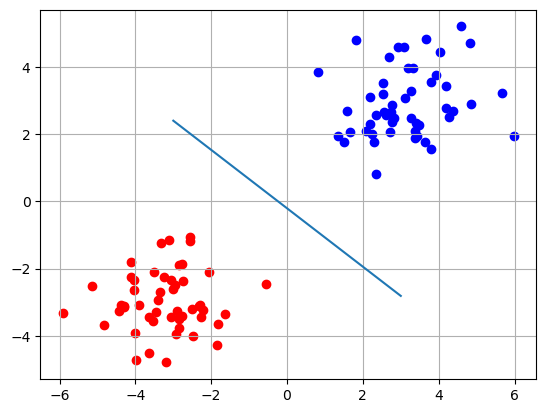

In [72]:
import autograd.numpy as np_   # Thinly-wrapped version of Numpy
from autograd import grad

def loss( parametros ):
    A, B, C, pontos, val = parametros
    est = A*pontos[0,:] + B*pontos[1,:] + C
    mse = np_.mean( (est - val)**2)
    return mse

g = grad(loss)

pontos = np.hstack ( (dados_c1, dados_c2))
alvos = np.hstack ( (np.ones(50), -1*np.ones(50)))

A, B, C = 0.0, 0.1, 0.2
alpha = 10**-2

for n in range(100):
    grad_ = g( (A, B, C, pontos, alvos) )
    A -= alpha*grad_[0]
    B -= alpha*grad_[1]
    C -= alpha*grad_[2]


funcao = A*pontos[0,:] + B*pontos[1,:] + C

# Reta:
# y = -A/B x + C/B
x = np.linspace(-3,3,100)
y = -A*x/B - C/B

pontos_pos = pontos[:, funcao > 0]
pontos_neg = pontos[:, funcao < 0]
print(pontos_pos.shape, pontos_neg.shape)
plt.figure()
plt.scatter(pontos_pos[0,:], pontos_pos[1,:], c='b')
plt.scatter(pontos_neg[0,:], pontos_neg[1,:], c='r')
plt.plot(x, y)
plt.grid()
plt.show()

## Exercício 12
**Objetivo: fazer uma formulação matricial para o classificador linear**

Até o momento, a função que executamos para o classificador linear é:

$$
f(x,y) = Ax + By + C
$$

Nessa formulação, estamos assumindo que nossa entrada tem duas dimensões ($x$ e $y$).

Veja como $f(x,y)$ funciona como se $A$ é o "peso" atribuído a $x$, e $B$ é o "peso" atribuído a $y$. $C$ é uma variável que nos dá uma tendência que é independente das entradas.

Essa interpretação funciona para pontos em $2$ dimensões. Se quisermos, podemos assumir que nossa entrada tem $N$ dimensões, expressas em um vetor-coluna $\boldsymbol x$. Nesse caso, os coeficientes do nosso classificador devem ser colocados também em um vetor-coluna $\boldsymbol w$, e então ficamos com:

$$
f(\boldsymbol x) = b + \sum_n w_n x_n = \begin{bmatrix} w_0 & w_1 & ... & w_{N-1} \end{bmatrix} \begin{bmatrix} x_0 \\ x_1 \\ ... \\ x_{N-1} \end{bmatrix} + b = \boldsymbol w^T \boldsymbol x + b
$$

Usando uma formulação matricial, faça um classificador linear para separar os dados abaixo. Quais são os pesos $\boldsymbol w$ do classificador que você encontrou?

In [43]:
import numpy as np

SEP = 10
N_DIMENSOES = 5
N_DADOS = 500

dados_c1 = np.random.randn(N_DIMENSOES,N_DADOS) + SEP
dados_c2 = np.random.randn(N_DIMENSOES,N_DADOS) - SEP

In [44]:
import autograd.numpy as np_   # Thinly-wrapped version of Numpy
from autograd import grad

def loss( parametros ):
    w, b, pontos, val = parametros
    est = w.T @ pontos + b
    mse = np_.mean( (est - val)**2)
    return mse

g = grad(loss)

pontos = np.hstack ( (dados_c1, dados_c2))
alvos = np.hstack ( (np.ones(N_DADOS), -1*np.ones(N_DADOS)))

w = np.random.randn( N_DIMENSOES,1)
b = 0.0
alpha = 10**-3

for n in range(1000):
    grad_ = g( (w, b, pontos, alvos) )
    w -= alpha*grad_[0]
    b -= alpha*grad_[1]

print(w)
print(b)


[[-0.16123034]
 [ 0.10122426]
 [ 0.22259538]
 [-0.11248491]
 [ 0.04905519]]
-0.024619064692574955


## Exercício 13
**Objetivo: avaliar o classificador**

Neste momento, já somos capazes de encontrar os pesos $\boldsymbol w$ e o *bias* $b$ do nosso classificador. Porém: ele funciona bem, na prática?

Para saber disso, precisamos de dois conjuntos de dados. Um deles, chamado *conjunto de treino*, será usado para encontrar os pesos do classificador. O outro, chamado *conjunto de teste*, será usado para avaliar se o classificador funciona bem em dados que ele ainda não encontrou. Ambos os conjuntos têm pares de entradas e saídas.



In [65]:
import joblib
X_train, X_test, y_train, y_test = joblib.load('./dados_classificacao.joblib')

def accuracy(y_test, y_est):
    return np.mean(np.sign(y_test)==np.sign(y_est))

import autograd.numpy as np_   # Thinly-wrapped version of Numpy
from autograd import grad

def loss( parametros ):
    w, b, pontos, val = parametros
    est = w.T @ pontos + b
    mse = np_.mean( (est - val)**2)
    return mse

g = grad(loss)


w = np.random.randn( X_test.shape[0],1)
b = 0.0
alpha = 10**-2

for n in range(2000):
    grad_ = g( (w, b, X_train, y_train) )
    w -= alpha*grad_[0]
    b -= alpha*grad_[1]

print(w)
print(b)

y_est = w.T @ X_test + b

print(" accuracy:" , accuracy(y_test, y_est))


## Exercício 13
**Objetivo: mudar o critério do erro para máxima margem**

Neste momento, você deve ter definido uma função de *erro*, que é conhecida como *loss*. Sua função de erro, se tudo está certo, é uma implementação do erro quadrático mínimo. Porém, podemos pensar num outro critério.

Estamos buscando aqui uma reta que divide os dois grupos que temos.

O EQM é uma medida interessante porque é derivável e fácil de encontrar, mas, se fôssemos fazer "manualmente" uma reta que divide os grupos, escolheríamos aquela que passa o mais "no meio" possível dos dois grupos. Veja, por exemplo, na situação da figura abaixo provavelmente escolheríamos a reta azul para separar os grupos azul e vermelho, embora as outras retas também possam ser usadas para fazer a separação:

<img src="maxima_margem.png" width=300 height=300 />

O motivo dessa escolha é que a reta parece estar *mais distante* das núvens de pontos - na verdade, ela está realizando a classificação usando a máxima *margem*.

A *margem* que estamos falando aqui é definida usando o conceito de distância entre pontos e retas. Gostaríamos que a menor distância entre a nossa reta e os pontos do grupo 1 fosse igual à menor distância entre a reta e os pontos do grupo 2.

Vamos então por partes. A distância entre um ponto e uma reta [tem uma equação bem conhecida](https://en.wikipedia.org/wiki/Distance_from_a_point_to_a_line), que está implementada abaixo:

In [40]:
def distancia_entre_ponto_e_reta(A, B, C, x, y):
    return np_.abs(A*x+B*y+C)/np_.sqrt( (A**2+B**2) )

print("Exemplo: ", distancia_entre_ponto_e_reta(1, -1, 0, 1, 1))

Exemplo:  0.0


Agora, vamos implementar o critério de máxima margem passo a passo:

1. Faça uma função `menor_distancia` que recebe uma reta (A, B, C) e um conjunto de pontos como entrada, e retorna a distância entre a reta e o ponto mais próximo dela (isto é, calcule a distância entre ponto e reta para todos os pontos e encontre a menor dessas distâncias).
1. Faça uma função `margem` que recebe uma reta e dois conjuntos de pontos, encontra `menor_distancia` para cada um deles (`m1` e `m2`), e retorna a diferença entre os quadrados de `m1` e `m2`.
1. Com base no exercício 11, faça um sistema que encontra o classificador (a reta A, B, C) que maximiza a margem calculada pela função `margem`.
1. Refaça os testes do exercício 11 para esse novo classificador. Como ele se comporta?

In [ ]:
import autograd.numpy as np_   # Thinly-wrapped version of Numpy
from autograd import grad

def distancia_entre_ponto_e_reta(A, B, C, x, y):
    return np_.abs(A*x+B*y+C)/np_.sqrt( (A**2+B**2) )

def menor_distancia(A, B, C, pontos):
    dist = np_.min(distancia_entre_ponto_e_reta(A, B, C, pontos[0,:], pontos[1,:]))
    return dist

def margem (A, B, C, pontos1, pontos2):
    m1 = menor_distancia(A, B, C, pontos1)
    m2 = menor_distancia(A, B, C, pontos2)
    margem = (m1-m2)**2
    return margem

def loss( parametros ):
    A, B, C, pontos1, pontos2 = parametros
    return margem(A, B, C, pontos1, pontos2)

g = grad(loss)

pontos = np.hstack ( (dados_c1, dados_c2))
alvos = np.hstack ( (np.ones(50), -1*np.ones(50)))

A, B, C = 0.0, 0.1, 0.2
alpha = 10**-2

for n in range(100):
    grad_ = g( (A, B, C, pontos, alvos) )
    A -= alpha*grad_[0]
    B -= alpha*grad_[1]
    C -= alpha*grad_[2]


funcao = A*pontos[0,:] + B*pontos[1,:] + C

# Reta:
# y = -A/B x + C/B
x = np.linspace(-3,3,100)
y = -A*x/B - C/B

pontos_pos = pontos[:, funcao > 0]
pontos_neg = pontos[:, funcao < 0]
print(pontos_pos.shape, pontos_neg.shape)
plt.figure()
plt.scatter(pontos_pos[0,:], pontos_pos[1,:], c='b')
plt.scatter(pontos_neg[0,:], pontos_neg[1,:], c='r')
plt.plot(x, y)
plt.grid()
plt.show()

# Parte 4

## Jogar cara-a-cara ou semelhante

## Usar o critério de Entropia de Shannon para jogar cara-a-cara

## Usar Sklearn para ganhar o cara-a-cara avaliando as features mais relevantes para classificação

## Usar Sklearn para montar uma árvore de decisão em um problema real

## Avaliar a árvore de decisão em termos de accuracy para o problema real

## Comparar desempenho da árvore com desempenho do classificador linear

# Projeto

## Em um dataset, usar regressão linear para encontrar quais são as features mais relevantes

In [50]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

data = load_breast_cancer()
data.target [ data.target<0.5] = -1
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.5)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).T.astype(float)
X_test = scaler.transform(X_test).T.astype(float)
y_train = np.array(y_train).reshape( (-1,1) ).astype(float)
y_test = np.array(y_test).reshape( (-1,1) ).astype(float)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
joblib.dump((X_train, X_test, y_train, y_test), './dados_classificacao.joblib')

(30, 284) (30, 285) (284, 1) (285, 1)


['./dados_classificacao.joblib']